In [1]:
#importing the necessary libraries
from cgitb import text
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Goal: Web scraping of FinViz articles, analyzing them and figure out every day if my stock has positive news associated with it or negative

In [2]:
#fetching the article url
finviz_url = 'https://finviz.com/quote.ashx?t='

#choosing our tickers
tickers = ['NFLX', 'GOOG', 'AMD']

news_tables = {}

#iterating over tickers to get the html data
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent':'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, 'html')

    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table
    
news_tables

{'NFLX': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
 <tr><td align="right" width="130">Feb-22-23 05:45PM</td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/netflix-nflx-dips-more-broader-224510841.html" onclick="trackAndOpenNews(event, 'Zacks', 'https://finance.yahoo.com/news/netflix-nflx-dips-more-broader-224510841.html');" rel="nofollow" target="_blank">Netflix (NFLX) Dips More Than Broader Markets: What You Should Know</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Zacks</span></div></div></td></tr>
 <tr><td align="right" width="130">02:38PM</td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/15-most-promising-qqq-stocks-193849815.html" onclick="trackAndOpenNews(event, 'Insider Monkey', 'https://finance.

In [3]:
#parsing the html data to a nice, readable format
parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):
        if row.a is not None:
            title = row.a.text
            date_data = row.td.text.split(' ')

            if len(date_data) == 1:
                time = date_data[0]
            else:
                date = date_data[0]
                time = date_data[1]

            parsed_data.append([ticker, date, time, title])

parsed_data


[['NFLX',
  'Feb-22-23',
  '05:45PM',
  'Netflix (NFLX) Dips More Than Broader Markets: What You Should Know'],
 ['NFLX',
  'Feb-22-23',
  '02:38PM',
  '15 Most Promising QQQ Stocks According to Hedge Funds'],
 ['NFLX',
  'Feb-22-23',
  '11:40AM',
  'CMLS vs. NFLX: Which Stock Is the Better Value Option?'],
 ['NFLX',
  'Feb-22-23',
  '10:00AM',
  "Warren Buffett's Buying This Passive Income Stock. Should You?"],
 ['NFLX',
  'Feb-22-23',
  '09:00AM',
  "Did Harry and Meghan blow up their brand? The prince's popularity is at a record low after the release of 'Spare'  but the Duke and Duchess aren't done telling their story yet"],
 ['NFLX',
  'Feb-22-23',
  '08:43AM',
  'Netflix (NFLX) Stock Quotes, Company News And Chart Analysis'],
 ['NFLX',
  'Feb-22-23',
  '08:42AM',
  'FANG Stocks News & Quotes: Facebook, Amazon, Netflix, Google'],
 ['NFLX',
  'Feb-22-23',
  '08:30AM',
  "Apple TV+ growth has 'flat-lined' as users say service lacks value: UBS"],
 ['NFLX',
  'Feb-21-23',
  '04:48PM',


In [4]:
#creating a pandas dataframe 
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
df.head()

,ticker,date,time,title
0,NFLX,Feb-22-23,05:45PM,Netflix (NFLX) Dips More Than Broader Markets:...
1,NFLX,Feb-22-23,02:38PM,15 Most Promising QQQ Stocks According to Hedg...
2,NFLX,Feb-22-23,11:40AM,CMLS vs. NFLX: Which Stock Is the Better Value...
3,NFLX,Feb-22-23,10:00AM,Warren Buffett's Buying This Passive Income St...
4,NFLX,Feb-22-23,09:00AM,Did Harry and Meghan blow up their brand? The ...


In [5]:
df.shape

(300, 4)

In [6]:
#calculate sentiment analysis using Vader
vader = SentimentIntensityAnalyzer()

#applying the vader polarity score on the title column of the data
score = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(score)

df.head()

,ticker,date,time,title,compound
0,NFLX,Feb-22-23,05:45PM,Netflix (NFLX) Dips More Than Broader Markets:...,0.0000
1,NFLX,Feb-22-23,02:38PM,15 Most Promising QQQ Stocks According to Hedg...,0.4576
2,NFLX,Feb-22-23,11:40AM,CMLS vs. NFLX: Which Stock Is the Better Value...,0.6486
3,NFLX,Feb-22-23,10:00AM,Warren Buffett's Buying This Passive Income St...,0.2023
4,NFLX,Feb-22-23,09:00AM,Did Harry and Meghan blow up their brand? The ...,0.1280


In [7]:
#formatting the date column
df['date'] = pd.to_datetime(df.date).dt.date
df

,ticker,date,time,title,compound
0,NFLX,2023-02-22,05:45PM,Netflix (NFLX) Dips More Than Broader Markets:...,0.0000
1,NFLX,2023-02-22,02:38PM,15 Most Promising QQQ Stocks According to Hedg...,0.4576
2,NFLX,2023-02-22,11:40AM,CMLS vs. NFLX: Which Stock Is the Better Value...,0.6486
3,NFLX,2023-02-22,10:00AM,Warren Buffett's Buying This Passive Income St...,0.2023
4,NFLX,2023-02-22,09:00AM,Did Harry and Meghan blow up their brand? The ...,0.1280
...,...,...,...,...,...
295,AMD,2023-02-01,12:14PM,AMD Stock Goes for Major Breakout After Earnin...,0.0000
296,AMD,2023-02-01,12:11PM,"AMD Q4 Earnings Beat, Data Center Growth Aids ...",0.5267
297,AMD,2023-02-01,11:58AM,Stock Market Lower Ahead Of Fed News; These IB...,-0.5574
298,AMD,2023-02-01,11:49AM,Could This Be the Bottom for AMD Stock?,0.0000


In [8]:
#grouping the dataset to have one row for each date since there are multiple rows for different times within a day 
#and using the mean of the compound score 
#finally creating the dataset to have per day mean compound score for each ticker 
mean_df = df.groupby(['ticker', 'date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis="columns").transpose()
mean_df

ticker,AMD,GOOG,NFLX
date,,,
2023-02-01,0.028552,NaN,NaN
2023-02-02,-0.005937,-0.059557,0.210750
2023-02-03,0.091067,-0.006767,-0.005683
2023-02-04,0.345367,NaN,0.599400
2023-02-05,0.107200,-0.648600,NaN
2023-02-06,0.209950,-0.129420,0.224892
2023-02-07,0.253533,0.024933,0.140500
2023-02-08,-0.153440,-0.013462,0.101017
2023-02-09,0.273967,0.031233,-0.096925


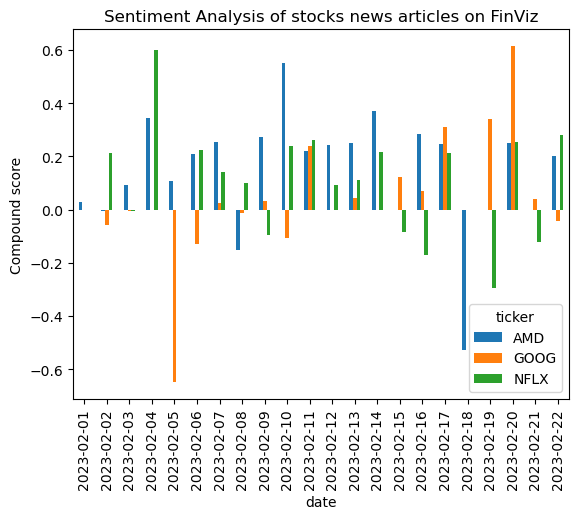

In [9]:
#visualize data as a bar chart to check how the stocks have progressed over the week
mean_df.plot(kind='bar')
plt.title("Sentiment Analysis of stocks news articles on FinViz")
plt.ylabel("Compound score")
plt.show()

### We see that during the first few days of the month Google stock news had negative sentiment whereas Netflix stock news is associated with negative sentiment towards the later half of the month. The stock news sentiment is mostly positive for AMD